## About the data set
The data set contains record of the sales items from jan 2013 to oct 2015.

#### File descriptions
-	**sales_train.csv** - the training set. Daily historical data from January 2013 to October 2015.
-	**test.csv** - the test set. You need to forecast the sales for these shops and products for November 2015.
-	**sample_submission.csv** - a sample submission file in the correct format.
-	**items.csv** - supplemental information about the items/products.
-	**item_categories.csv**  - supplemental information about the items categories.
-	**shops.csv**- supplemental information about the shops.

#### Data fields
-	**ID** - an Id that represents a (Shop, Item) tuple within the test set
-	**shop_id** - unique identifier of a shop
-	**item_id** - unique identifier of a product
-	**item_category_id** - unique identifier of item category
-	**item_cnt_day** - number of products sold. You are predicting a monthly amount of this measure
-	**item_price** - current price of an item
-	**date** - date in format dd/mm/yyyy
-	**date_block_num** - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
-	**item_name** - name of item
-	**shop_name** - name of shop
-	**item_category_name** - name of item category
This dataset is permitted to be used for any purpose, including commercial use.



## Importing the libraries

In [351]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read the data

In [394]:
items = pd.read_csv('items.csv')
item_categories = pd.read_csv('item_categories.csv')
sales_train = pd.read_csv('sales_train.csv')
sample_submission = pd.read_csv('sample_submission.csv')
shops = pd.read_csv('shops.csv')
test = pd.read_csv('test.csv')

In [353]:
# check the shape of the data

print('items shape: ', items.shape)
print('item_categories shape: ', item_categories.shape)
print('sales_train shape: ', sales_train.shape)
print('sample_submission shape: ', sample_submission.shape)
print('shops shape: ', shops.shape)
print('test shape: ', test.shape)


items shape:  (22170, 3)
item_categories shape:  (84, 2)
sales_train shape:  (2935849, 6)
sample_submission shape:  (214200, 2)
shops shape:  (60, 2)
test shape:  (214200, 3)


### Check the data types of the data

In [354]:
# check the data types
print('items data types: ', items.dtypes)
print('**********')
print('item_categories data types: ', item_categories.dtypes)
print('**********')
print('sales_train data types: ', sales_train.dtypes)


items data types:  item_name           object
item_id              int64
item_category_id     int64
dtype: object
**********
item_categories data types:  item_category_name    object
item_category_id       int64
dtype: object
**********
sales_train data types:  date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object


In [355]:
print('sample_submission data types: ', sample_submission.dtypes)
print('**********')
print('shops data types: ', shops.dtypes)
print('**********')
print('test data types: ', test.dtypes)

sample_submission data types:  ID                  int64
item_cnt_month    float64
dtype: object
**********
shops data types:  shop_name    object
shop_id       int64
dtype: object
**********
test data types:  ID         int64
shop_id    int64
item_id    int64
dtype: object


### Show first sample of the data

In [356]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [357]:
# check the data 
items.sample(5)

,item_name,item_id,item_category_id
4122,"KRAZ [PC, Цифровая версия]",4122,31
10993,ДЖЕКИ БРАУН (2DVD),10993,40
19121,СТРАНА ХОРОШИХ ДЕТОЧЕК,19121,40
4128,Kaspersky Anti-Virus 2013 Russian Edition. 2-D...,4128,75
14705,МОЙ ДРУГ ИВАН ЛАПШИН (rem.),14705,40


In [358]:
sales_train.sample(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
295552,09.03.2013,2,6,7076,2999.0,1.0
709073,11.07.2013,6,56,21422,149.0,1.0
2679514,20.06.2015,29,46,13557,2499.0,1.0
2079961,17.10.2014,21,47,16316,999.0,1.0
562956,14.06.2013,5,14,6916,749.5,1.0
2636597,16.05.2015,28,27,5815,1999.0,1.0
378906,08.04.2013,3,22,10689,799.0,1.0
691545,24.07.2013,6,54,17806,399.0,1.0
2036809,18.10.2014,21,25,7895,899.0,1.0
2752958,30.07.2015,30,51,21682,95.0,1.0


In [359]:
sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [360]:
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [361]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


### Check the missing values in the data

In [362]:
# check the missing values
print('items missing values: ', items.isnull().sum())
print('**********')
print('item_categories missing values: ', item_categories.isnull().sum())
print('**********')
print('sales_train missing values: ', sales_train.isnull().sum())
print('**********')
print('sample_submission missing values: ', sample_submission.isnull().sum())


items missing values:  item_name           0
item_id             0
item_category_id    0
dtype: int64
**********
item_categories missing values:  item_category_name    0
item_category_id      0
dtype: int64
**********
sales_train missing values:  date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64
**********
sample_submission missing values:  ID                0
item_cnt_month    0
dtype: int64


In [363]:
print('shops missing values: ', shops.isnull().sum())
print('**********')
print('test missing values: ', test.isnull().sum())


shops missing values:  shop_name    0
shop_id      0
dtype: int64
**********
test missing values:  ID         0
shop_id    0
item_id    0
dtype: int64


### Now we check some trends in the dataset so we edit a new column of year and month in the Sales_train file

In [365]:
# make a column for a year from date_block_num column
sales_train['year'] = sales_train['date_block_num'].apply(lambda x: 2013 + x//12) 

In [366]:
sales_train.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year
1785206,04.06.2014,17,45,15299,849.0,1.0,2014
1231026,24.12.2013,11,57,5581,499.0,1.0,2013
2259744,20.12.2014,23,15,7723,2999.0,1.0,2014
2086098,04.10.2014,21,53,7048,999.0,1.0,2014
2712,09.01.2013,0,24,2349,399.0,1.0,2013


In [367]:
# add a column month to the data 
sales_train['month'] = sales_train['date_block_num'].apply(lambda x: x%12)
sales_train.sample(5)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
1702542,25.05.2014,16,44,14904,58.0,1.0,2014,4
1228276,30.12.2013,11,57,6672,7990.0,1.0,2013,11
611022,23.06.2013,5,59,20272,549.0,1.0,2013,5
455381,23.05.2013,4,22,839,3000.0,1.0,2013,4
1011315,05.10.2013,9,7,3734,2599.0,7.0,2013,9


- There is an issue with month column, it is not in the correct format, so we need to fix it. we can do it by adding 1 to the month column.
- In this data set date_block_num column start with 0 but month start with 1. So we need to add 1 to the month column.

In [368]:
# add 1 to the month column
sales_train['month'] = sales_train['month'] + 1
sales_train.sample(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month
824549,03.08.2013,7,6,13901,299.0,1.0,2013,8
2847881,28.09.2015,32,51,13238,561.0,1.0,2015,9
1720087,09.06.2014,17,31,2047,549.0,1.0,2014,6
1602971,11.04.2014,15,44,13821,199.0,1.0,2014,4
1244621,14.12.2013,11,31,6474,399.0,1.0,2013,12


## Check the Trends and Explore the data

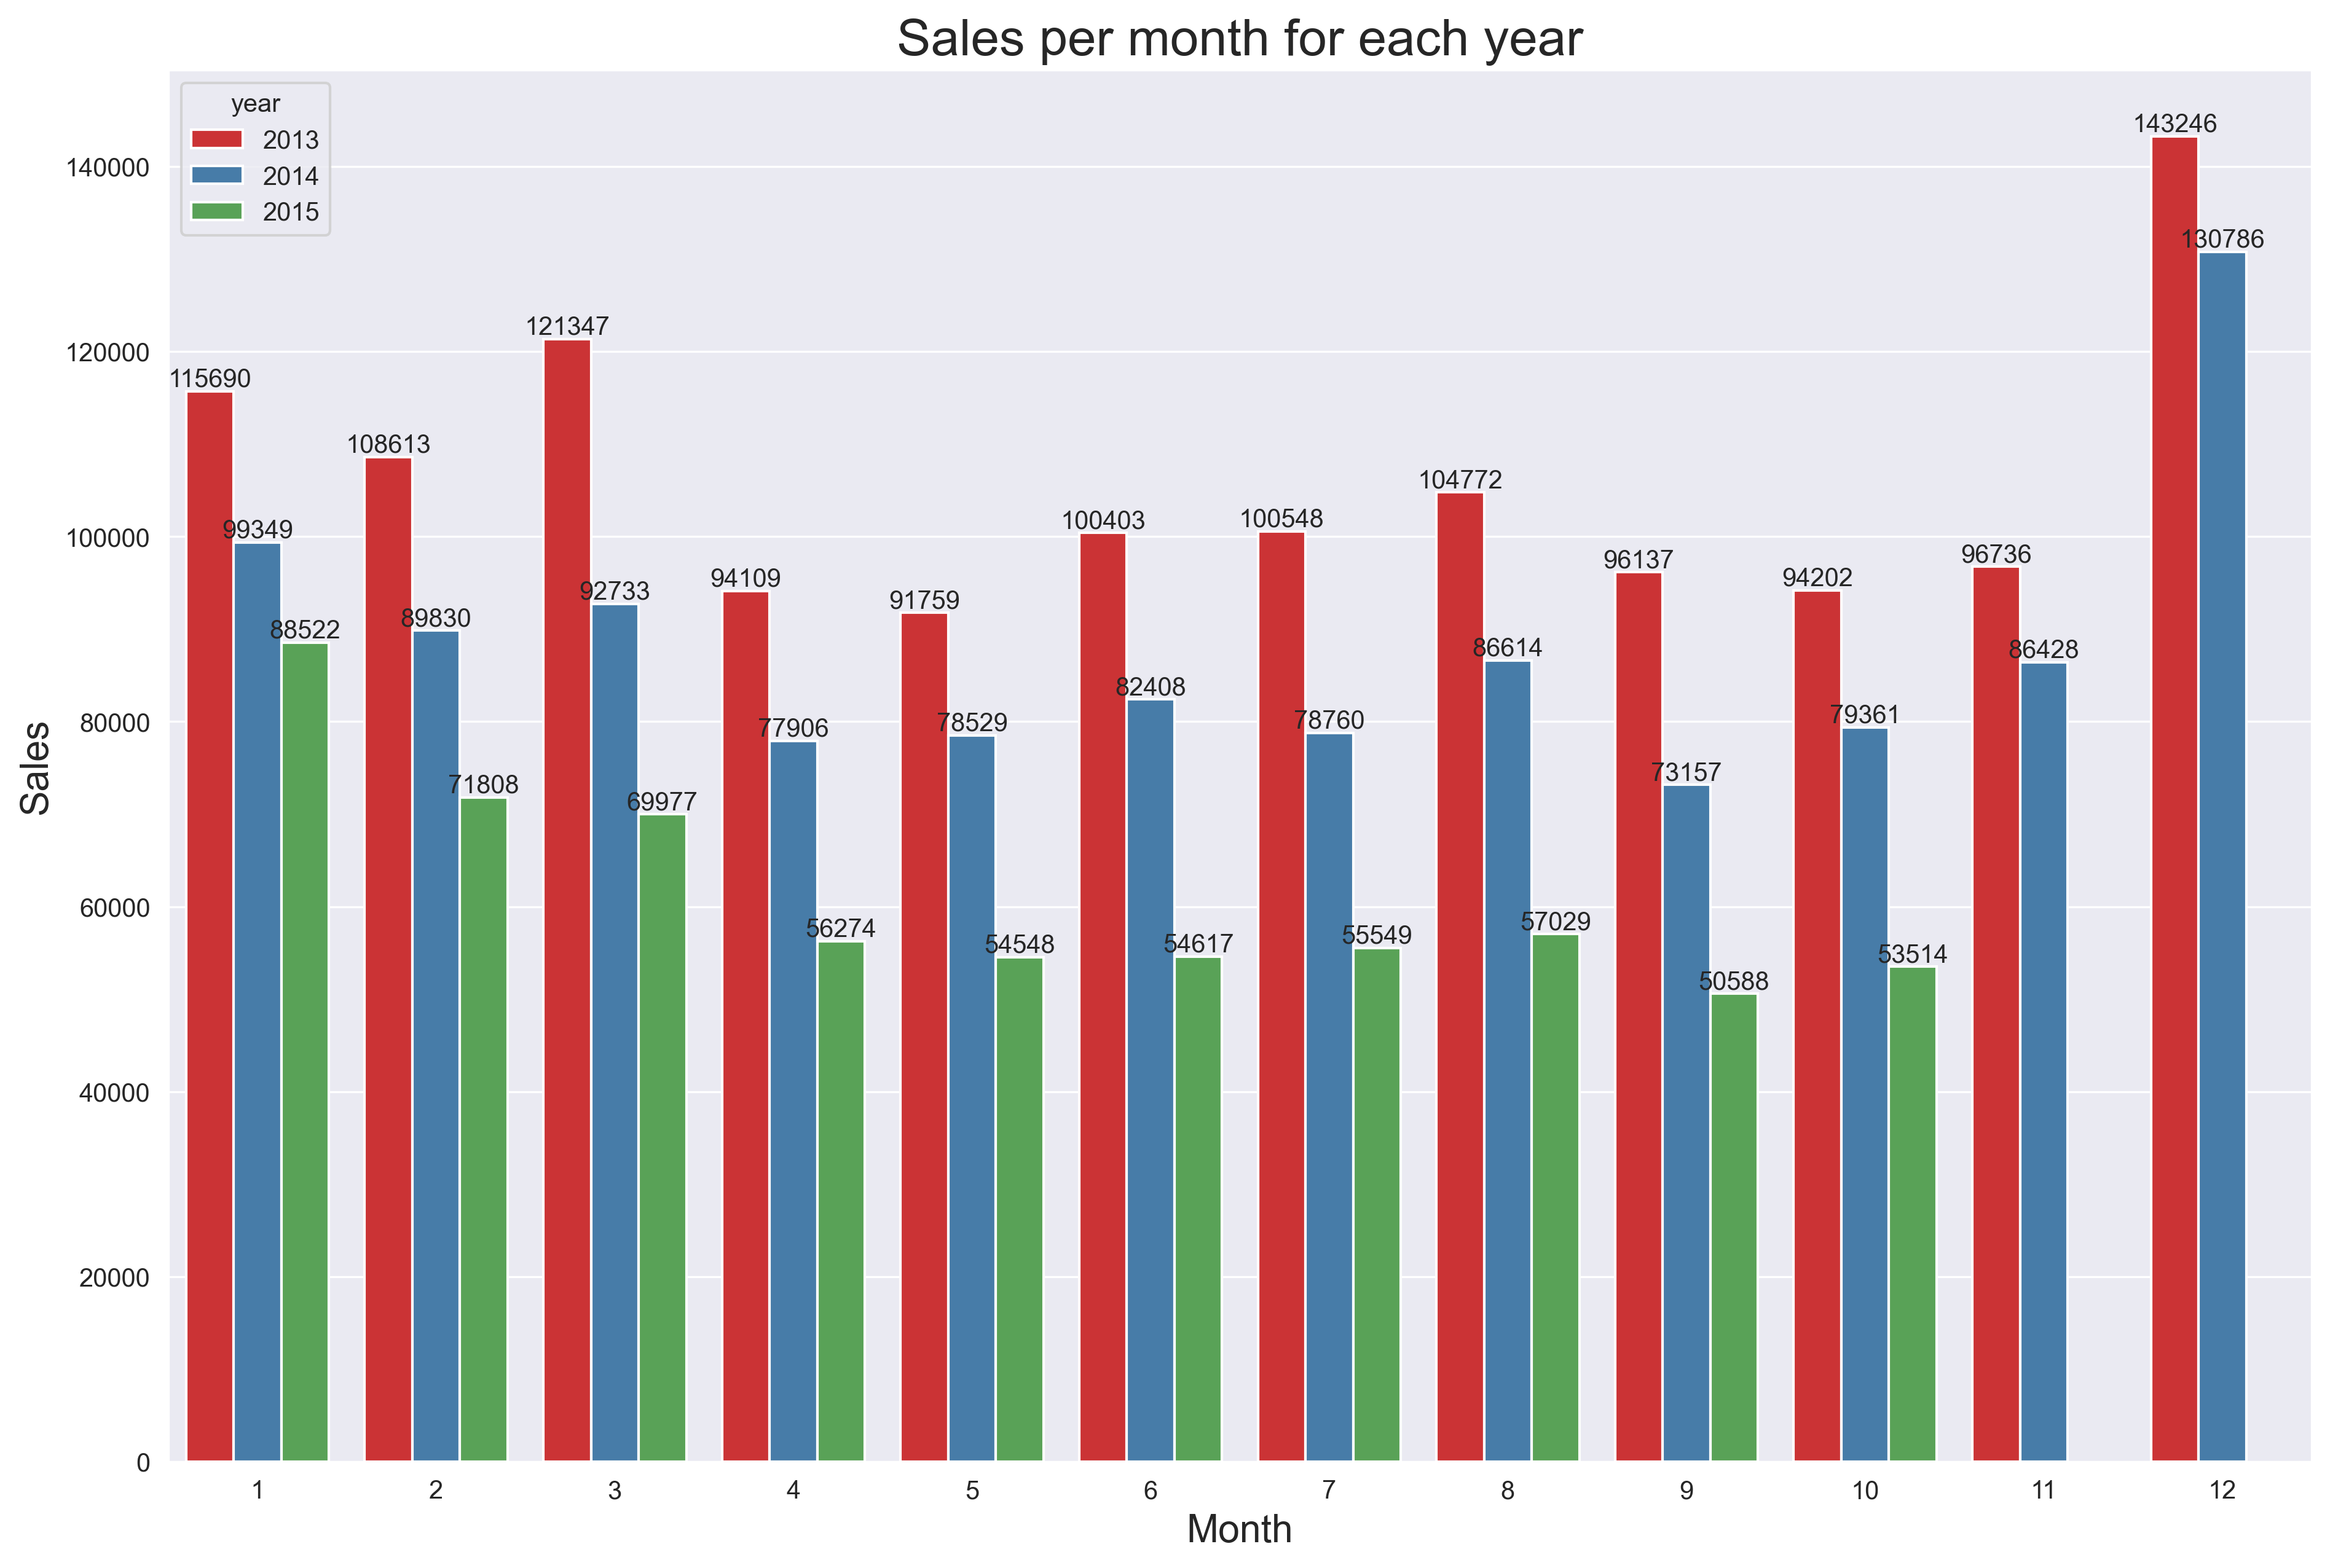

In [369]:
# make a  plot for the sales per month for each year using seaborn
sns.set_style('darkgrid')
plt.figure(figsize=(15,10), dpi=300)
sns.countplot(x='month', hue='year', data=sales_train , palette='Set1')
plt.title('Sales per month for each year', fontsize=20)
plt.xlabel('Month', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.bar_label(plt.gca().containers[0], fmt='%.0f')  
plt.bar_label(plt.gca().containers[1], fmt='%.0f')
plt.bar_label(plt.gca().containers[2], fmt='%.0f')

plt.show()



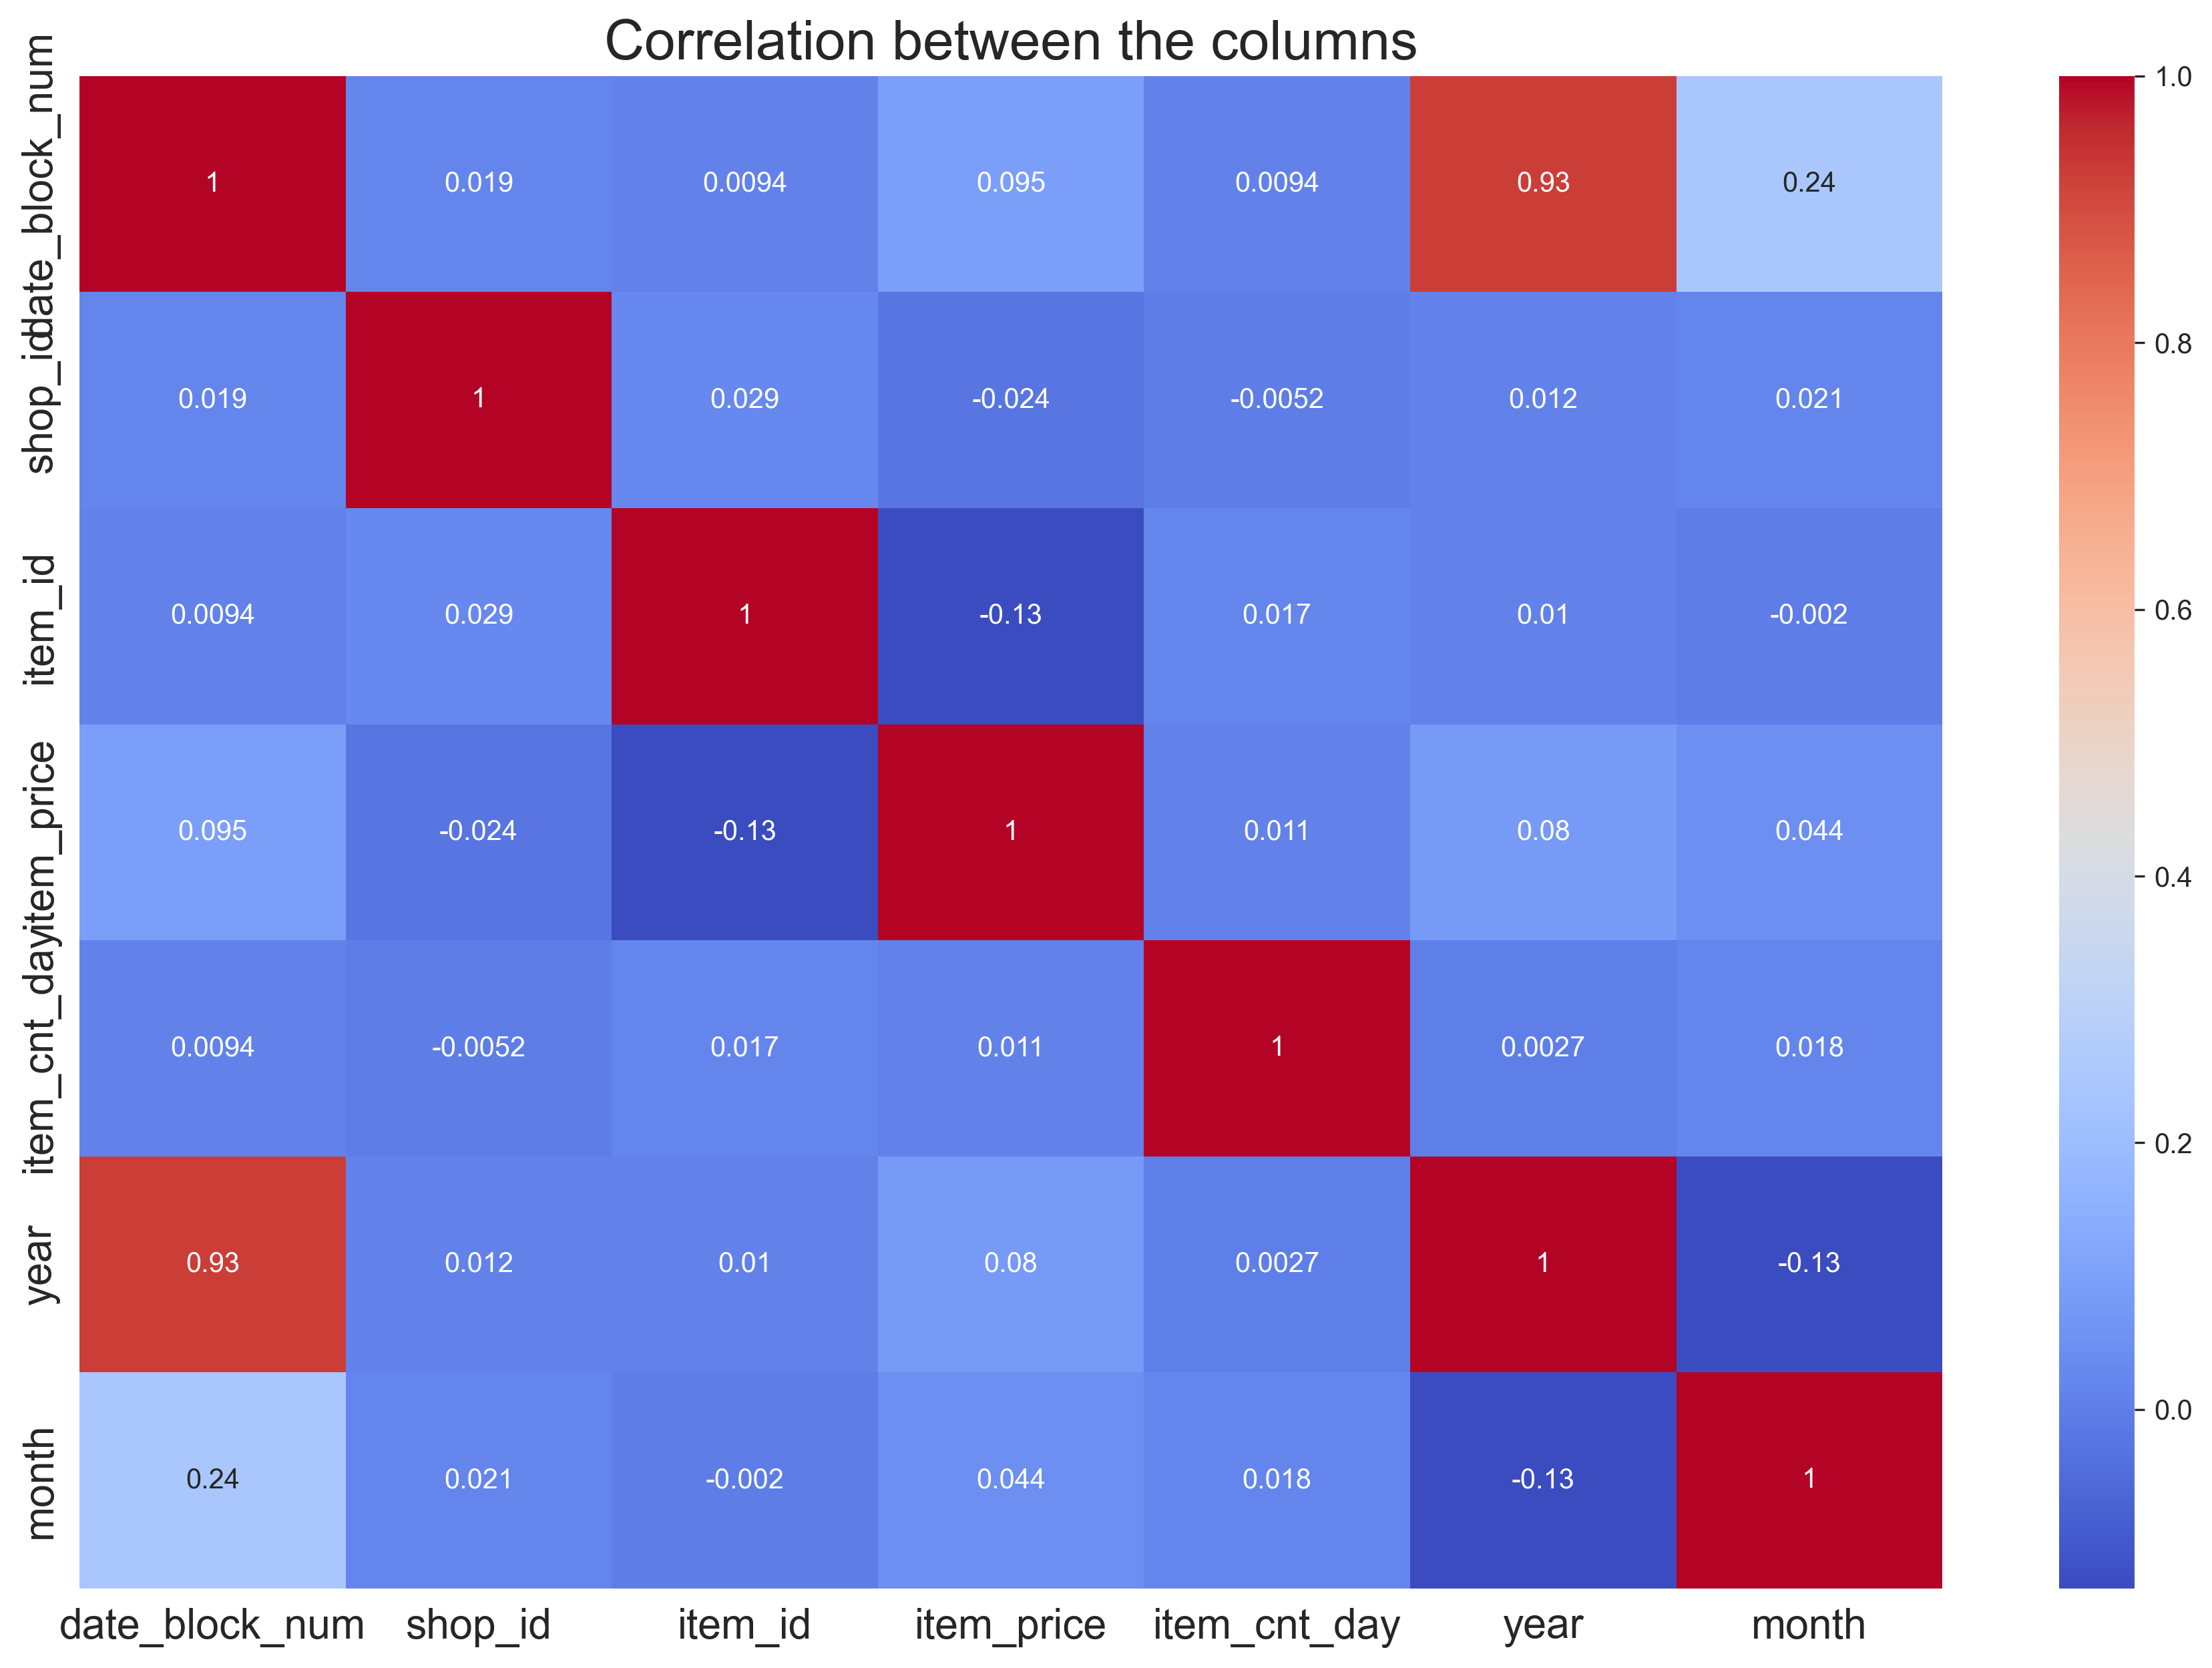

In [370]:
# make a heatmap for the correlation
plt.figure(figsize=(15,10), dpi=300)    
sns.heatmap(sales_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between the columns', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


### highest and lowest sales of items

In [371]:
# check top 10 shops with the highest sales
top_10_shops = sales_train.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
top_10_shops

shop_id
31    310777.0
25    241920.0
54    185790.0
28    184557.0
42    144934.0
57    141107.0
27    136657.0
6     100489.0
58     81734.0
46     78990.0
Name: item_cnt_day, dtype: float64

In [372]:
# check the top 10 shpos with the least sales
least_10_shops = sales_train.groupby('shop_id')['item_cnt_day'].sum().sort_values(ascending=True).head(10)
least_10_shops



shop_id
36     330.0
11     572.0
8     3595.0
40    4943.0
33    5482.0
20    5872.0
1     6311.0
34    6451.0
23    7705.0
32    8781.0
Name: item_cnt_day, dtype: float64

In [373]:
# check the top 10 items with the highist sales
least_10_items = sales_train.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
least_10_items

item_id
20949    187642.0
2808      17245.0
3732      16642.0
17717     15830.0
5822      14515.0
3734      11688.0
6675      10289.0
3731      10099.0
1855      10032.0
16787      9227.0
Name: item_cnt_day, dtype: float64

In [374]:
# check the top 10 items with the least sales
least_10_items = sales_train.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=True).head(15)
least_10_items

item_id
1590    -11.0
13474    -1.0
11871    -1.0
18062    -1.0
13477     0.0
7547      0.0
8515      0.0
4591      0.0
7181      1.0
7189      1.0
7167      1.0
7163      1.0
7200      1.0
7217      1.0
7219      1.0
Name: item_cnt_day, dtype: float64

### some issue 
- There must be an issue with the sales, because the sales is negative.
- May b its a typing error or may b its a return of the product.
- lets assume its a typing error and we will replace the negative value with positive value.

In [385]:
# replace the negative values with positive values by using absolute function if value  is less than 0.0
sales_train['item_cnt_day'] = sales_train['item_cnt_day'].apply(lambda x: abs(x) if x < 0.0 else x)


In [390]:
# check items with the least sales
least_10_items = sales_train.groupby('item_id')['item_cnt_day'].sum().sort_values(ascending=True).head(10)
least_10_items


item_id
0       1.0
7149    1.0
7150    1.0
7151    1.0
7153    1.0
7158    1.0
7160    1.0
7163    1.0
7167    1.0
7174    1.0
Name: item_cnt_day, dtype: float64

In [391]:
# check the top 10 items with the highest price and the least price
top_10_items = sales_train.groupby('item_id')['item_price'].sum().sort_values(ascending=False).head(10)
top_10_items


item_id
6675     1.132643e+08
13443    2.135946e+07
3732     1.756505e+07
3734     1.589006e+07
5823     1.307078e+07
13405    1.253271e+07
5672     1.206254e+07
16787    1.203159e+07
5822     9.984311e+06
17717    9.924972e+06
Name: item_price, dtype: float64

In [392]:
# check the top 10 items with  the least price
least_10_items = sales_train.groupby('item_id')['item_price'].sum().sort_values(ascending=True).head(10)
least_10_items

item_id
22098     7.0
13090    11.0
22010    14.0
7756     15.0
16834    17.0
3856     17.0
18098    21.0
11702    22.4
16256    22.4
4592     22.4
Name: item_price, dtype: float64